# Balancing a Pole on a Cart



**Contributions**

Reviewing literature on RL algorithms for the Cart-Pole problem: All

Implementing and testing different RL algorithms such as Q-learning, Deep Q Networks (DQN), Dueling networks, etc. : All 

Assignment of tasks (including documentation):

Task 1: Nalin, Yong Jian

Task 2: Dong Wan, Nalin

Task 3: Yong Jian, Dong Wan

## Installation of Dependencies

In [ ]:
!apt-get install -y xvfb python-opengl > /dev/null 2>&1
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!pip install gym[classic_control]
!apt-get update > /dev/null 2>&1
!apt-get install cmake > /dev/null 2>&1
!pip install --upgrade setuptools 2>&1
!pip install ez_setup > /dev/null 2>&1
!pip install tensorflow==2.7.0
!pip install gym
!pip install keras
!pip install keras-rl2
!pip install pygame

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 60.1 MB/s eta 0:00:00
  Attempting uninstall: pygame
    Found existing installation: pygame 2.3.0
    Uninstalling pygame-2.3.0:
      Successfully uninstalled pygame-2.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.7/489.7 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 463.1/463.1 KB 45.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 76.9 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.11.0
    Uninstalling tensorflow-estimator-2.11.

## Importing Dependencies and Define Helper Functions

After installing the above dependencies, we need to import them in order to use them in our code. Additionally, we will create a function that will play a short video depicting how the cart is balancing on the pole at the end of this lab.

In [ ]:
import gym
from gym import logger as gymlogger
from gym.wrappers import RecordVideo
gymlogger.set_level(40) #error only
import tensorflow as tf
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
import glob
import io
import base64
from IPython.display import HTML
from IPython import display as ipythondisplay

def show_video():
    """
    Function to play video of cart balancing on the pole.
    """
    mp4list = glob.glob('video/*.mp4')
    if len(mp4list) > 0:
        mp4 = mp4list[0]
        video = io.open(mp4, 'r+b').read()
        encoded = base64.b64encode(video)
        ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                    loop controls style="height: 400px;">
                    <source src="data:video/mp4;base64,{0}" type="video/mp4" />
                    </video>'''.format(encoded.decode('ascii'))))
    else: 
        print("Could not find video")

## Setting Up the CartPole Environment

In this lab, we will be creating an environment based on version 1 of CartPole, using Python's **gym** library.

In [ ]:
env = gym.make("CartPole-v1")

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The observation space of this environment can be determined as follows. In this case, the first 2 array elements in the tuple contain the minimum and maximum values (respectively) of the 4 observed values, each of which corresponding to cart position, velocity, pole angle and angular velocity.

In [ ]:
print(env.observation_space)

Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)


Next, the action space of this environment can be determined as follows. In this case, it is "Discrete(2)", which indicates that there are **2** valid discrete actions that the CartPole can perform in this environment - 0 for pushing to the **left** and 1 for pushing to the **right**.

In [ ]:
print(env.action_space)

Discrete(2)


Each round of the pole-balancing game is known as an **episode**. At the start of each episode, we need to make sure that the environment is reset, such that a random initial state will be chosen for each episode. An example of an initial state can be that the pole is tilted slightly to the right. 

The observation of the initial state can be determined as follows:

In [ ]:
observation = env.reset()
print("Initial observations:", observation)

Initial observations: [-0.02079632 -0.04333283  0.00013937  0.03282137]


As mentioned earlier, our CartPole environment has 2 discrete actions that can be performed by the cart pole - either being pushed to the left (0) or to the right (1).

In the following example, we push the cart pole to the right, and the following code returns the new observation, the current reward, an indicator of whether the game ends, and some additional information which is not relevant to this lab. For each step in which the pole is balanced until the game ends, 1 point will be rewarded. However, the maximum cumulative reward is 500.

In [ ]:
observation, reward, done, info = env.step(1)
print("New observations after choosing action 1:", observation)
print("Reward for this step:", reward)
print("Is this round done?", done)

New observations after choosing action 1: [-0.02166298  0.15178712  0.00079579 -0.25981757]
Reward for this step: 1.0
Is this round done? False


To demonstrate how a full round of the game is like, we will adopt a naive strategy of choosing action 1 (pushing the cart pole to the right) all the time. The cumulative reward in the round is shown below. 



In [ ]:
observation = env.reset()
cumulative_reward = 1
done = False

while not done:
    # Reward for current step
    observation, reward, done, info = env.step(1)  
    # Reward will be accumulated from all steps
    cumulative_reward += reward 

# Reward for the full round
print("Cumulative reward for this round:", cumulative_reward) 

Cumulative reward for this round: 9.0


Clearly, the naive strategy performs poorly as it could survive only about a dozen of steps.

# Task 1: Development of an RL agent

## Importing Essential Libraries

In our project, we utilize a Deep Q-Network (DQN) agent. The DQN agent is a reinforcement learning algorithm that learns to make decisions by maximizing a reward signal. We train the agent through its interactions with the environment and learning from the observed rewards. Here's a brief description of each library/model used:



> os and io are Python libraries for working with files and directories.

> numpy is a library for scientific, numeric computations in python 

> Flatten is a class from the keras.layers module that flattens the input to a neural network.

> Dense is a class from the keras.layers module that represents a fully connected layer in a neural network.

> Sequential is a class from the keras.models module that enables the creation of a layered neural network model.

> Adam is a class from the keras.optimizers module that implements the Adam optimization algorithm.

> DQNAgent is a class from the rl.agents module that implements the DQN algorithm.

> SequentialMemory is a class from the rl.memory module that implements a memory buffer for the DQN algorithm.

> MaxBoltzmannQPolicy is a class from the rl.policy module that implements the Max-Boltzmann exploration strategy.



In [ ]:
import os
import io
import numpy as np
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from rl.agents import DQNAgent
from rl.memory import SequentialMemory
from rl.policy import MaxBoltzmannQPolicy


## Agent & Model Building


The following code creates a DQN agent with a neural network that has two fully connected layers and a flatten layer. 

We explore the Keras-RL Library and implement the DQNAgent class and its various functions to build a neural network agent that help to train the cartpole.The agent uses the **MaxBoltzmannQPolicy** policy and the SequentialMemory memory.

(*Note about policy usage*: 
The Boltzmann Q and Max-Boltzmann Q policies build a probability law based on Q values and returns an action selected randomly according to this law. We chose to use Max-Boltzmann Q for our exploration policy over Boltzmann Q as we noticed a remarkable improvement in the reward, over Boltzmann Q. We attribute this change to the control of randomness present in the Max-Boltzmann Q policy. This is useful when the agent needs to balance exploration and exploitation, and also useful when the agent is stuck in a local optimum value and needs to explore more.)



In [ ]:
states = env.observation_space.shape[0]
actions = env.action_space.n
os.environ["SDL_VIDEODRIVER"] = "dummy"

def create_agent(model, actions):
    memory = SequentialMemory(limit=50000, window_length=1)
    policy = MaxBoltzmannQPolicy() # exploration policy of choice
    dqn = DQNAgent(model=model, memory=memory, policy=policy, nb_actions=actions, nb_steps_warmup=10, target_model_update=1e-2)
    return dqn

Next, to build the neural network we utilize the Keras library.The neural network has an input layer with the number of states in the environment, and subsequently two hidden layers with 24 neurons each, which also represents the dimensionality of the respective output spaces. Finally, we add an output layer with dimensionality corresponding to the number of actions in the environment. 

In [ ]:
def create_model(states, actions):
    model = Sequential() # To sequentially add the neural layers
    model.add(Flatten(input_shape=(1, states)))
    model.add(Dense(24, activation='relu')) # two 'hidden' layers
    model.add(Dense(24, activation='relu'))
    model.add(Dense(actions, activation='linear')) # output
    return model

Lastly, the agent is trained using the fit method of the DQNAgent class. The fit method takes the environment, the number of steps to train the agent, and other parameters as input. 'nb_steps' represents the number of times the agent will run the neural network. We have experimented to use between 30000 - 100000 and we found out that **50000** can give us the most optimal output as too many steps will cause overfitting issue.

In [ ]:
# Building model and agent
model = create_model(states, actions) 
dqn = create_agent(model, actions)

# Optimizing training params using the Adam optimizer
dqn.compile(Adam(lr=1e-3), metrics=['mae'])

# Training the agent, with a calculated optimum no. of steps
dqn.fit(env, nb_steps=50000, visualize=False, verbose=1)

/usr/local/lib/python3.9/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Training for 50000 steps ...
Interval 1 (0 steps performed)


/usr/local/lib/python3.9/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


    1/10000 [..............................] - ETA: 8:26:16 - reward: 1.0000

/usr/local/lib/python3.9/dist-packages/rl/memory.py:37: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')
/usr/local/lib/python3.9/dist-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 11 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)


   19/10000 [..............................] - ETA: 10:54 - reward: 1.0000

/usr/local/lib/python3.9/dist-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 12 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
/usr/local/lib/python3.9/dist-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 13 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
/usr/local/lib/python3.9/dist-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 14 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
/usr/local/lib/python3.9/dist-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 15 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
/usr/local/lib/python3.9/dist-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 16 + 1) instead
  batch_idxs

   27/10000 [..............................] - ETA: 8:48 - reward: 1.0000

/usr/local/lib/python3.9/dist-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 21 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
/usr/local/lib/python3.9/dist-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 22 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
/usr/local/lib/python3.9/dist-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 23 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
/usr/local/lib/python3.9/dist-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 24 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
/usr/local/lib/python3.9/dist-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 25 + 1) instead
  batch_idxs

10000/10000 [==============================] - 117s 11ms/step - reward: 1.0000
137 episodes - episode_reward: 72.642 [8.000, 342.000] - loss: 2.288 - mae: 15.553 - mean_q: 31.323

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 101s 10ms/step - reward: 1.0000
40 episodes - episode_reward: 247.825 [183.000, 437.000] - loss: 2.722 - mae: 35.064 - mean_q: 70.810

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 99s 10ms/step - reward: 1.0000
26 episodes - episode_reward: 377.423 [250.000, 500.000] - loss: 2.308 - mae: 42.472 - mean_q: 85.436

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 102s 10ms/step - reward: 1.0000
20 episodes - episode_reward: 500.000 [500.000, 500.000] - loss: 4.331 - mae: 45.934 - mean_q: 92.061

Interval 5 (40000 steps performed)
10000/10000 [==============================] - 100s 10ms/step - reward: 1.0000
done, took 518.715 seconds


## Rewards for Training Data of Neural Network


Note: This is not Task 2. This is not analyzing the cumulative reward over 100 episodes.

The code below aims to analyse the training data acquired from the neural network over more than 200 episodes. It can be seen that the initial result was unsatisfactory when the network was untrained. However, after 110 episodes, we can see a spike in the increase in rewards. The subsequent rewards for the training data starts to exceed 195. There were even several occasions where it hits the max reward of 500.

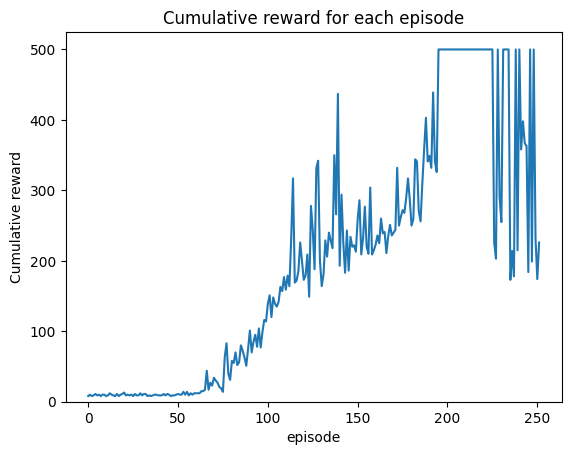

In [ ]:
# Getting training data from the DQN agent directly
rewardOutput = dqn.history.history['episode_reward']
plt.plot(rewardOutput)
plt.title('Cumulative reward for each episode')
plt.ylabel('Cumulative reward')
plt.xlabel('episode')

plt.ylim(ymin=0)

plt.show()

# Task 2: Demonstrate the Effectiveness of the RL Agent

# Model Testing & Graph Plotting For 100 Episodes

The code below displays the average reward over 100 episodes.

In [ ]:
reward_dic = dict()
observation = env.reset()
total_reward = 0
sum_reward = 0

for i in range(100):
  sum_reward+=total_reward
  total_reward = 0
  observation = env.reset()

  while True:
    # Reshape the observation to have three dimensions
    states = np.reshape(observation, (env.observation_space.shape[0]))

    # Predict the action using the neural network
    action = dqn.forward(states)

    # Take the action and get the next observation and reward
    observation, reward, done, info = env.step(action)

    #it will get 1 reward if the cartpole stays still for the time period
    total_reward+=reward
    reward_dic[i] = total_reward

    # Check if the episode is done (when pole falls)
    if done:
        break

env.close()

# Getting all the values of a dictionary as a list
list_of_the_values = list(reward_dic.values())

We will then plot a graph based on our test data for 100 episodes. Based on the graph, the cumulative reward for each episode ranges from around 200 to around 500, a possible indication that our DQN agent is "good enough".

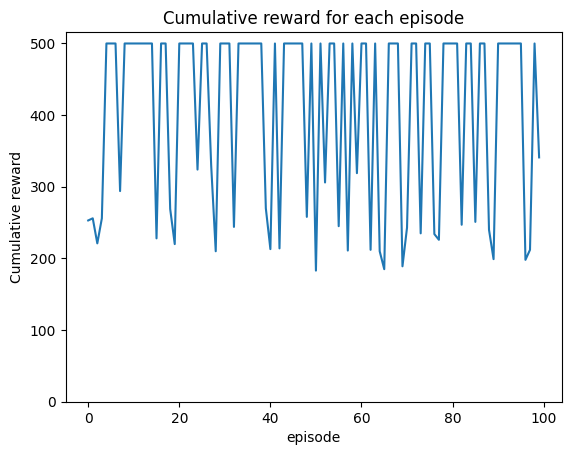

In [ ]:
plt.plot(list_of_the_values)
plt.title('Cumulative reward for each episode')
plt.ylabel('Cumulative reward')
plt.xlabel('episode')

plt.ylim(ymin=0)

plt.show()

To further ascertain this initial judgement about our DQN agent in balancing the cart on the pole, we will calculate the average cumulative reward and check if it is higher than the requirement of **195**.

In [ ]:
print("Average cumulative reward:", sum(list_of_the_values)/len(list_of_the_values))
print("Is my agent good enough?", (sum(list_of_the_values)/len(list_of_the_values)) > 195)

Average cumulative reward: 407.46
Is my agent good enough? True


From our average cumulative reward, we see that our model convincingly meets the requirement (~340 vs 195). Hence, the agent that we have constructed is deemed to be 'good enough'. 

# Task 3: Rendering 1 Episode Played By Our DQN Agent

We shall now plug our DQN agent into the code below to obtain our rendered result (total reward).

This is a video clip showing 1 episode of the cartpole environment that we have trained. It manages to balance itself for more than 10 seconds before eventually falling off, as compared to an untrained cartpole that is unable to stay for even 1 second. This indicates that our DQN agent is successful.

In [ ]:
from gym.wrappers import RecordVideo

env = RecordVideo(gym.make("CartPole-v1"), "./video")
observation = env.reset()


while True:
  env.render()
  # Reshape the observation to have three dimensions
  states = np.reshape(observation, (env.observation_space.shape[0]))
  # Take the action and get the next observation and reward
  action = dqn.forward(states)
  # Check if the episode is done
  observation, reward, done, info = env.step(action)

  if done:
      break

env.close()
show_video()

In [ ]:
dqn.save_weights('neural_network_weight.h5f', overwrite=True)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
